# **Data Description**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate


data = pd.read_csv('/content/onlinefraud.csv')
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [2]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [3]:
fraud_min_max = [
    ['amount', data.amount.min(), data.amount.max()],
    ['oldbalanceOrg', data.oldbalanceOrg.min(), data.oldbalanceOrg.max()],
    ['newbalanceOrig', data.newbalanceOrig.min(), data.newbalanceOrig.max()],
    ['oldbalanceDest', data.oldbalanceDest.min(), data.oldbalanceDest.max()],
    ['isFraud', data.isFraud.min(), data.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |        1.77 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 2.23523e+07 |
|  2 | newbalanceOrig |           0 |  2.2466e+07 |
|  3 | oldbalanceDest |           0 | 2.49552e+07 |
|  4 | isFraud        |           0 |           1 |


In [4]:
# Downcast numerical columns with smaller dtype
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = pd.to_numeric(data[col], downcast='float')
    if data[col].dtype == 'int64':
        data[col] = pd.to_numeric(data[col], downcast='unsigned')

# Use category dtype for categorical column
data['type'] = data['type'].astype('category')

In [5]:
# Check duplicate values
data.duplicated().sum()


0

# **Exploratory Data Analysis**

In [6]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

**Univariate Analysis**

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [8]:
data['step'].value_counts()

8    14296
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
Name: step, dtype: int64

There are 743 steps, and every step has at least 2 occurrences

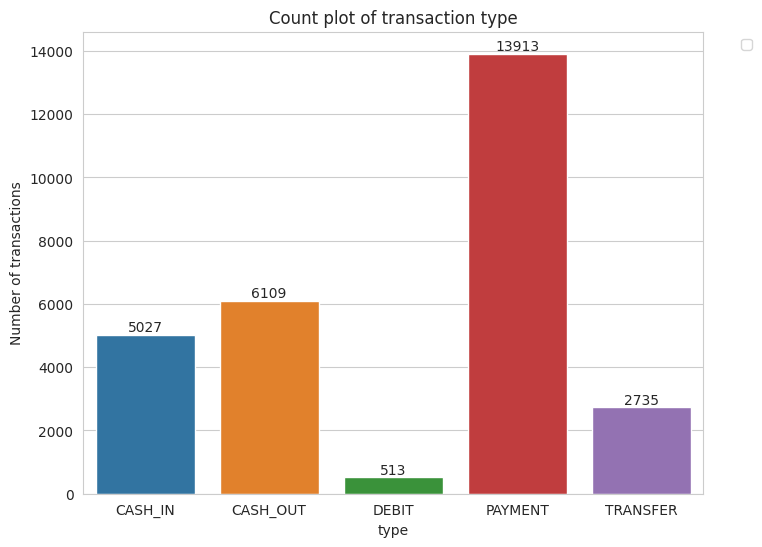

In [9]:
ax = sns.countplot(x='type', data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

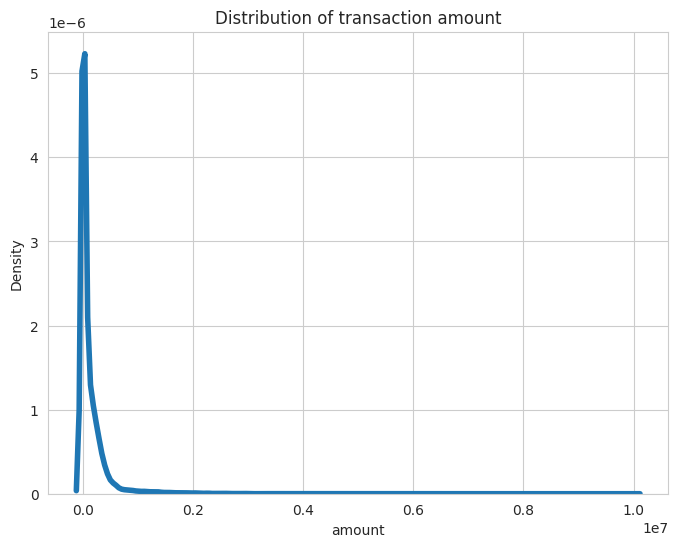

In [10]:
sns.kdeplot(data['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of transaction amounts is right skewed.
This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
(mode < median < mean)

In [11]:
data['nameOrig'].value_counts()

C1231006815    1
C78705343      1
C1780003984    1
C1292614373    1
C65515468      1
              ..
C2065936034    1
C1158016054    1
C851514585     1
C885018785     1
C1612091270    1
Name: nameOrig, Length: 28297, dtype: int64

There are 6353307 initial customers, and every step has at least 1 occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

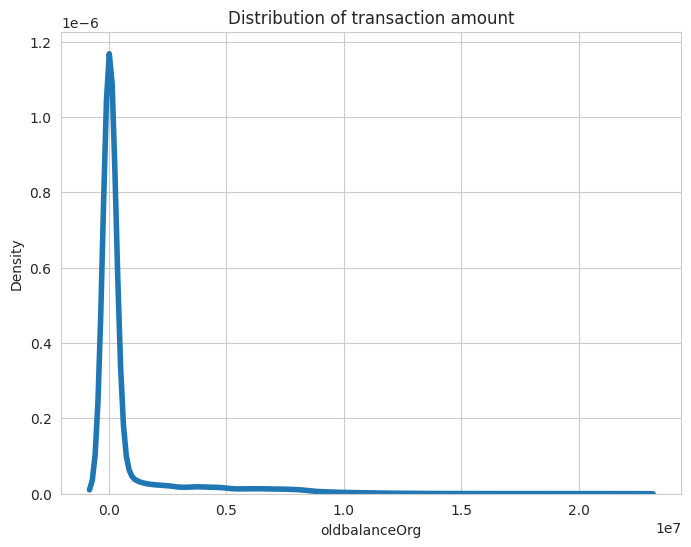

In [12]:
sns.kdeplot(data['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of pre-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

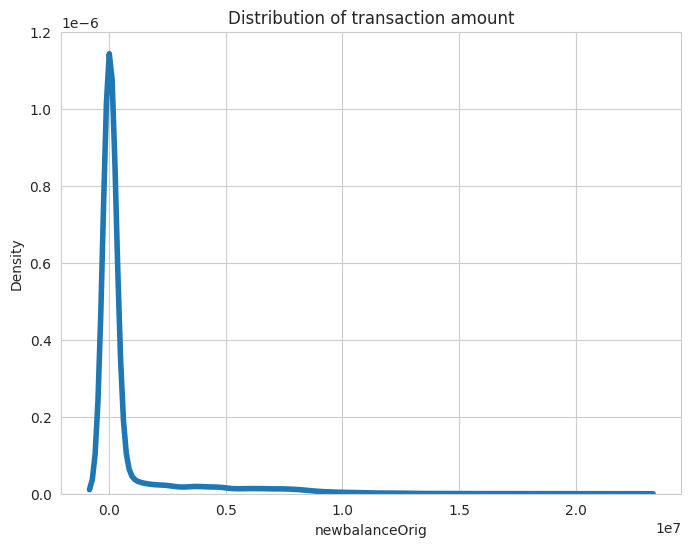

In [13]:
sns.kdeplot(data['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the initial customers is right skewed.

In [14]:
data['nameDest'].value_counts()

C985934102     71
C1286084959    60
C1590550415    59
C2083562754    58
C248609774     57
               ..
M234932558      1
M1653072658     1
M206287129      1
C1692066743     1
C345691183      1
Name: nameDest, Length: 17076, dtype: int64

There are 2722362 recipients, and every step has at least 1 occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

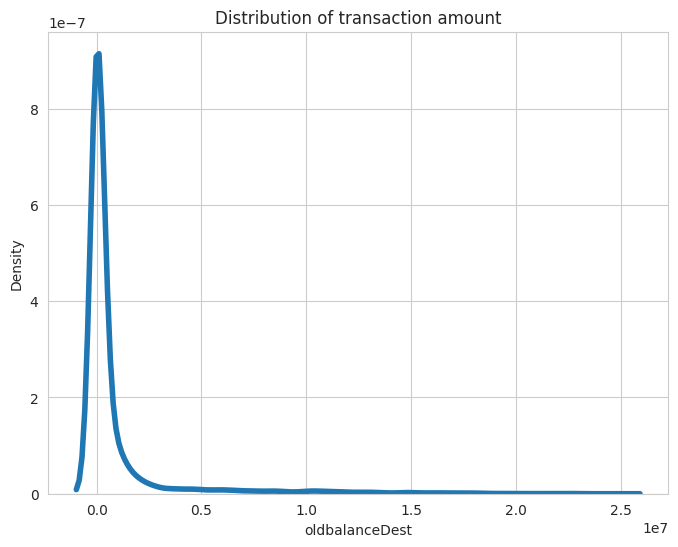

In [15]:
sns.kdeplot(data['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of pre-transaction balances of the recipient is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

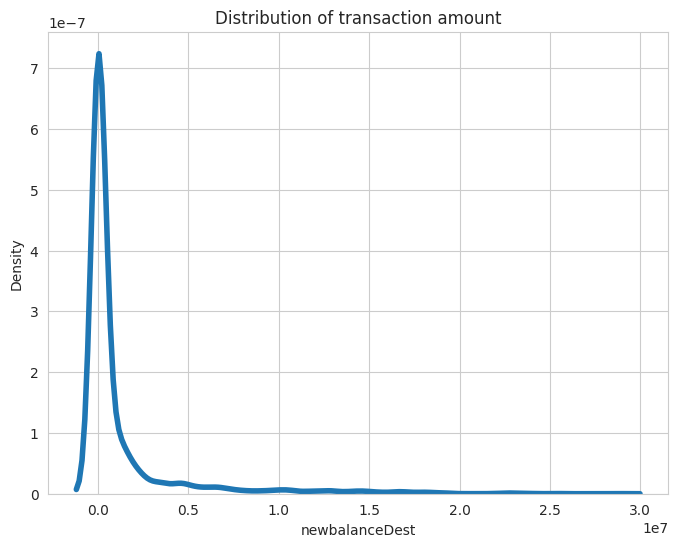

In [16]:
sns.kdeplot(data['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the recipient is right skewed.

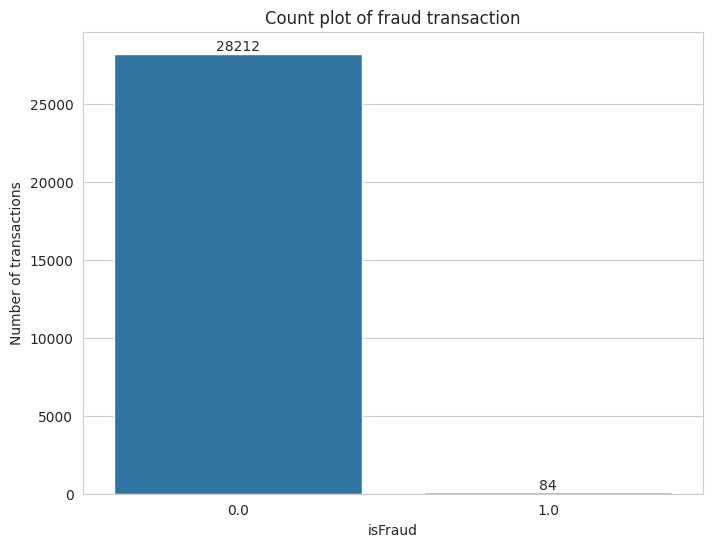

In [17]:
ax = sns.countplot(x='isFraud', data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction', fontsize=12)
plt.ylabel('Number of transactions')

del ax

There are much more non-fraudulent transactions than fraudulent transactions.

**Bivariate Analysis**

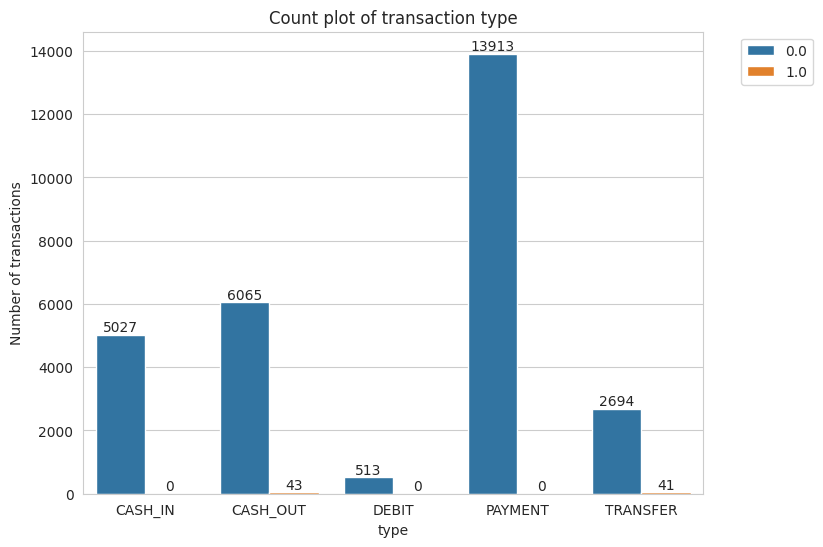

In [18]:
ax = sns.countplot(x='type', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax


Fraudulent transactions only occur in debit and transfer types.

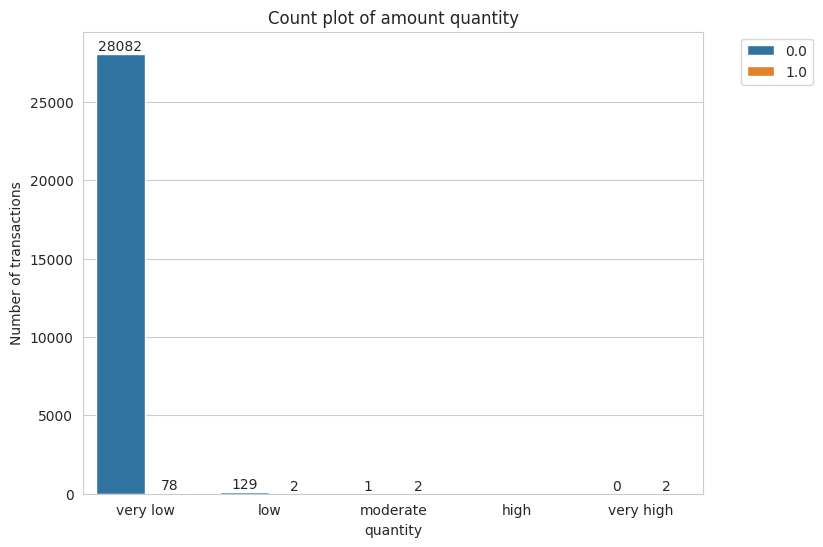

In [20]:
data['quantity'] = pd.cut(data['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

All fraudulent transactions fall into the category of very low amounts.
This suggests that in most cases, small transactions are more prone to fraudulent transactions.

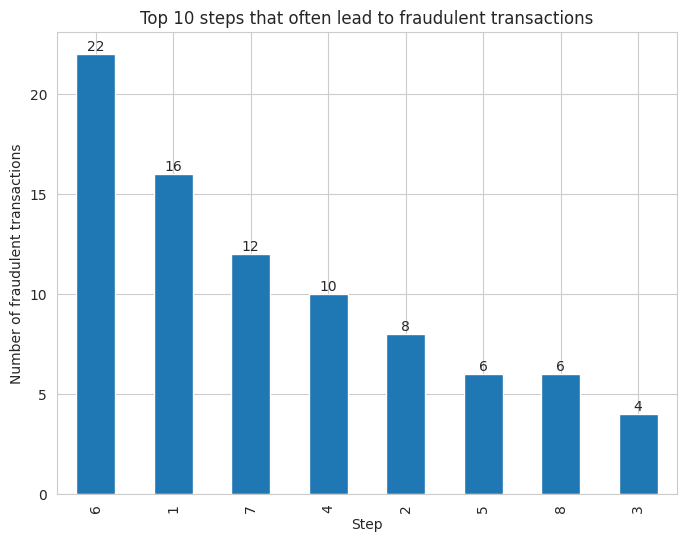

In [21]:
df1 = data[data['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')

del ax, df2

Step 212 has the highest number of fraudulent transactions, 40 cases.
This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

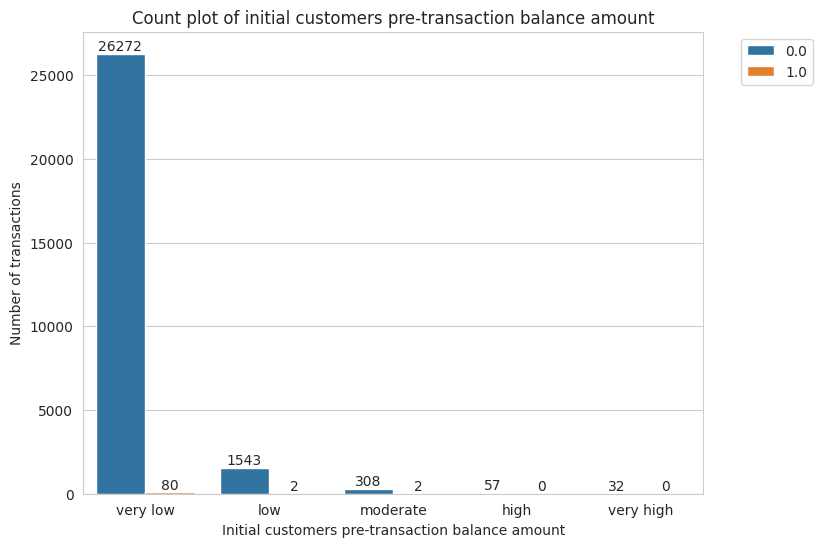

In [22]:
data['oldbalanceOrg_amt'] = pd.cut(data['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions.
This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

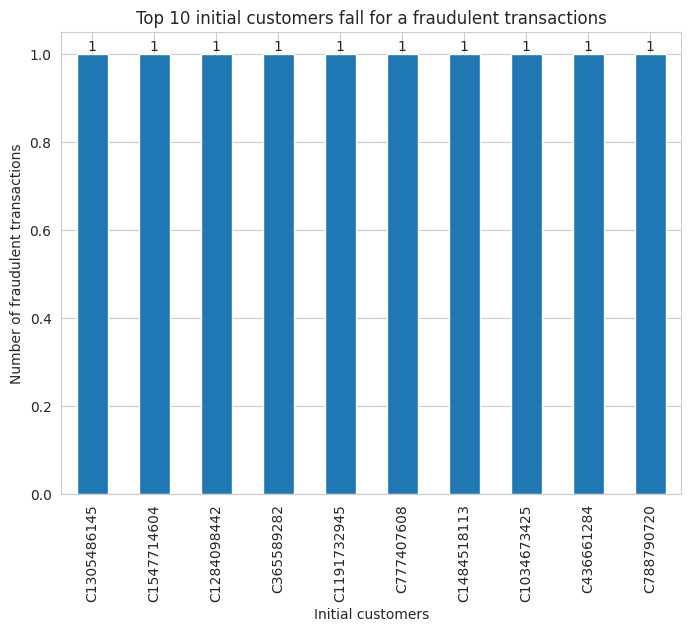

In [23]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')

del ax, df2

Initial customers are scammed of at most one for a fraudulent transaction.

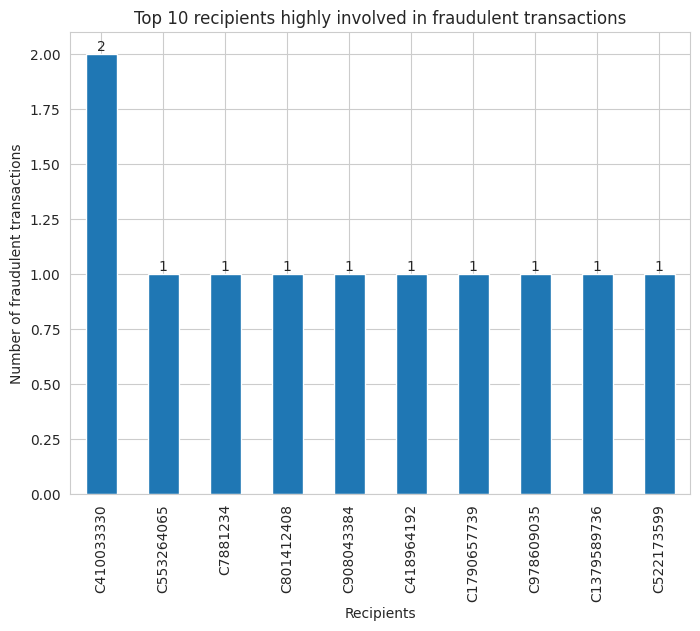

In [24]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')

del ax, df2


Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

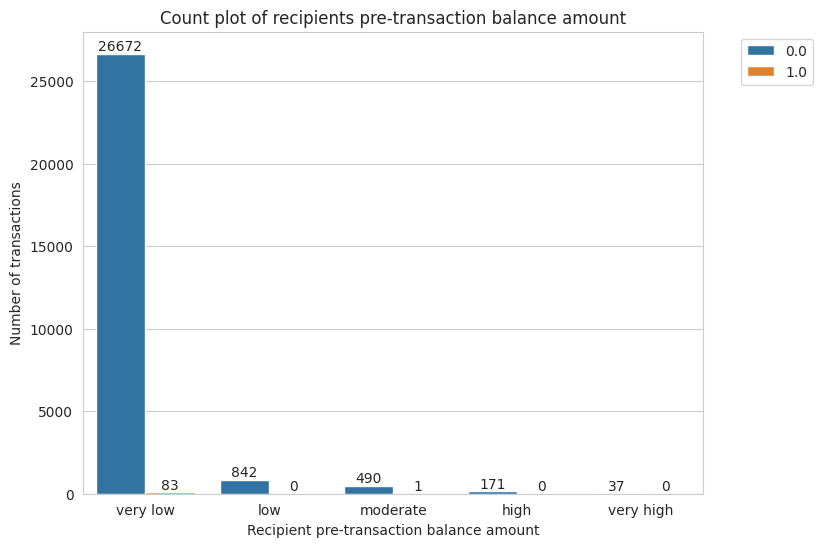

In [26]:
data['oldbalanceDest_amt'] = pd.cut(data['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.
This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.